In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.tseries.offsets import DateOffset
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import math
import warnings
warnings.filterwarnings("ignore")

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/master/perrin-freres-monthly-champagne-.csv')

In [60]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [61]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


####  Cleaning up the data

In [62]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


#### Drop last 2 rows

In [63]:
df.drop(106,axis=0,inplace=True)
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [64]:
df.drop(105,axis=0,inplace=True)
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


#### Convert Month into Datetime

In [65]:
date = pd.date_range(start='1/1/1964', end='09/30/1972', freq='M')
date

DatetimeIndex(['1964-01-31', '1964-02-29', '1964-03-31', '1964-04-30',
               '1964-05-31', '1964-06-30', '1964-07-31', '1964-08-31',
               '1964-09-30', '1964-10-31',
               ...
               '1971-12-31', '1972-01-31', '1972-02-29', '1972-03-31',
               '1972-04-30', '1972-05-31', '1972-06-30', '1972-07-31',
               '1972-08-31', '1972-09-30'],
              dtype='datetime64[ns]', length=105, freq='M')

In [66]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])
df.head()

,Month,Sales,Time_Stamp
0,1964-01,2815.0,1964-01-31
1,1964-02,2672.0,1964-02-29
2,1964-03,2755.0,1964-03-31
3,1964-04,2721.0,1964-04-30
4,1964-05,2946.0,1964-05-31


In [67]:
df = df.set_index('Time_Stamp')
df.head()

,Month,Sales
Time_Stamp,,
1964-01-31,1964-01,2815.0
1964-02-29,1964-02,2672.0
1964-03-31,1964-03,2755.0
1964-04-30,1964-04,2721.0
1964-05-31,1964-05,2946.0


In [68]:
df.drop('Month',axis=1,inplace=True)
df.head()

,Sales
Time_Stamp,
1964-01-31,2815.0
1964-02-29,2672.0
1964-03-31,2755.0
1964-04-30,2721.0
1964-05-31,2946.0


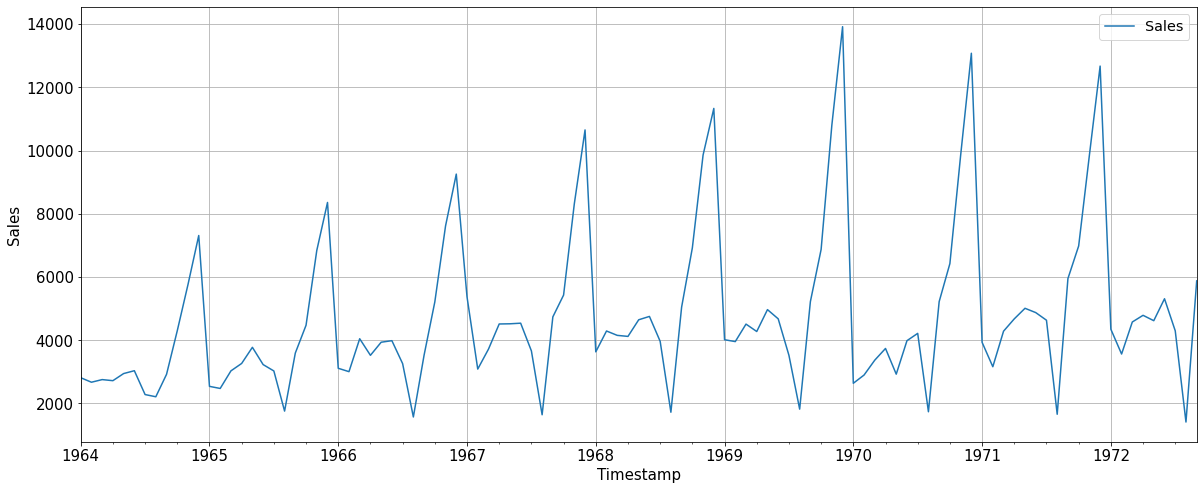

In [69]:
df.plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

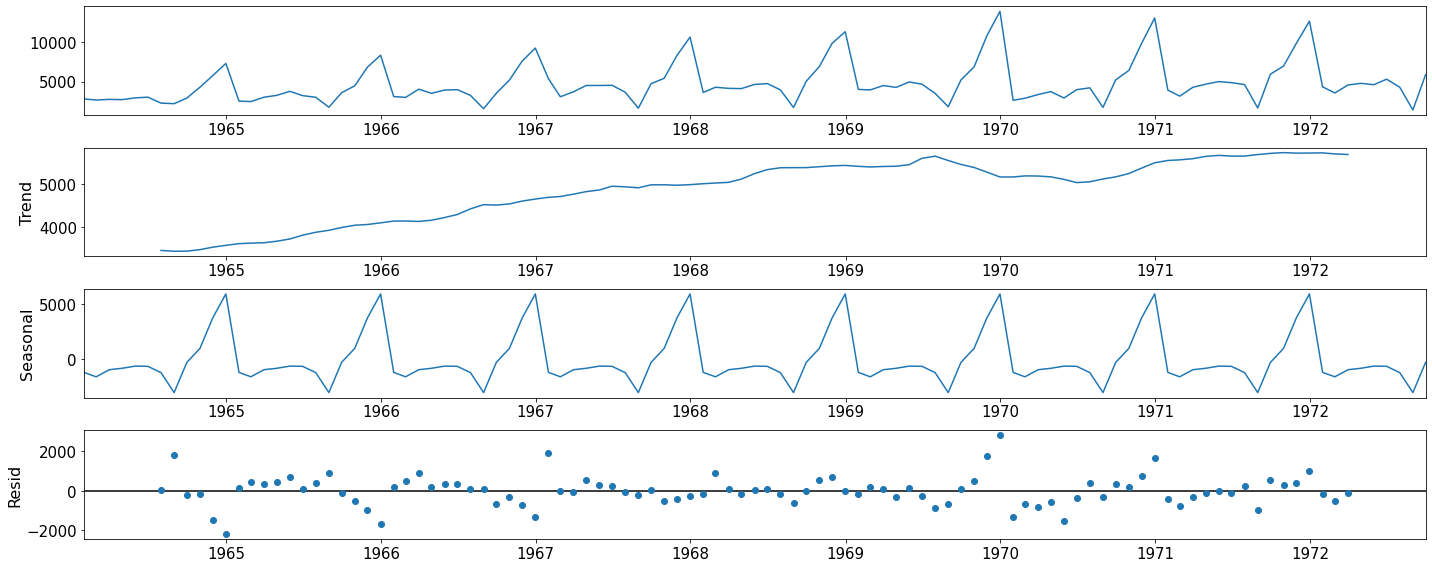

In [71]:
decomposition = seasonal_decompose(df, model = 'additive')
fig = decomposition.plot()
plt.show()

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.figsize'] = 20, 8

In [72]:
adftest = adfuller(df)
print('Pvalue of adfuller test is:', adftest[1])

Pvalue of adfuller test is: 0.3639157716602467


do not reject null hypothesis, ts is not stationary

In [73]:
len(df)

105

(<Figure size 1440x576 with 1 Axes>,)

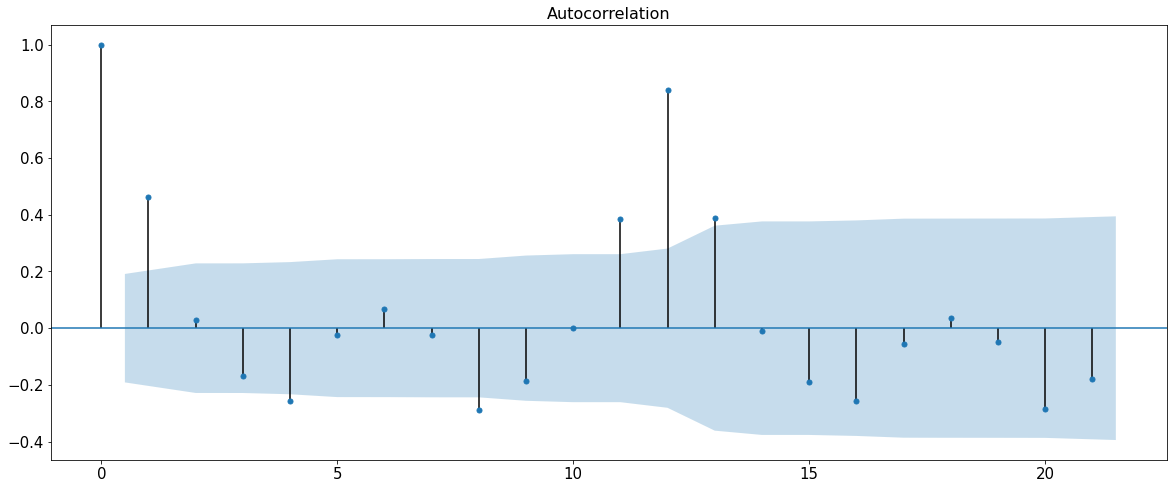

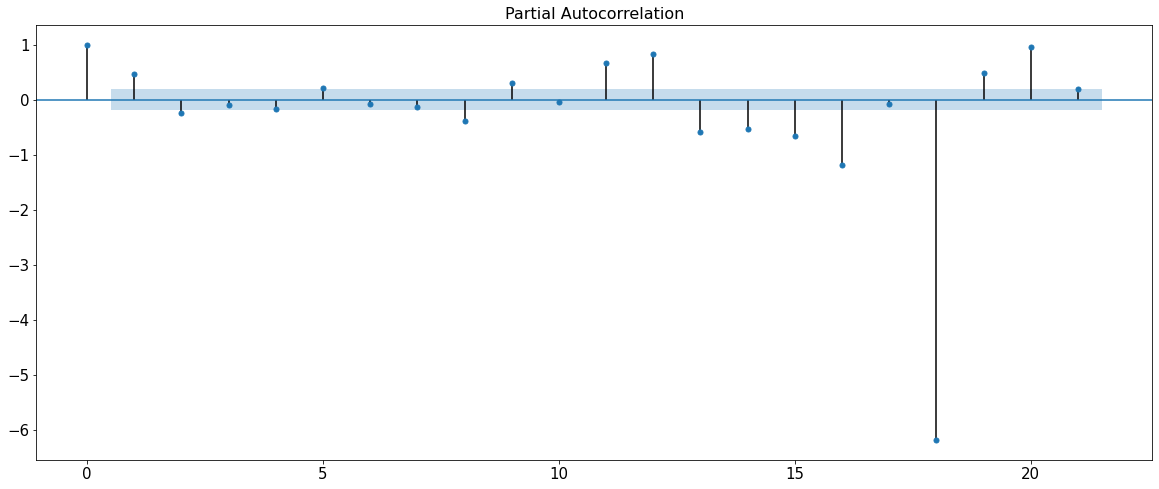

In [74]:
plot_acf(df),
plot_pacf(df),

#### Differencing

In [75]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df.head()

,Sales,Sales First Difference
Time_Stamp,,
1964-01-31,2815.0,NaN
1964-02-29,2672.0,-143.0
1964-03-31,2755.0,83.0
1964-04-30,2721.0,-34.0
1964-05-31,2946.0,225.0


In [76]:
df['Sales First Difference'].dropna( inplace=True)
adftest = adfuller(df['Sales First Difference'])
print('Pvalue of adfuller test is:', adftest[1])

Pvalue of adfuller test is: 2.51962044738698e-10


In [77]:
df['Sales second Difference'] = df['Sales'].diff(periods=2)
df.head()

,Sales,Sales First Difference,Sales second Difference
Time_Stamp,,,
1964-01-31,2815.0,NaN,NaN
1964-02-29,2672.0,-143.0,NaN
1964-03-31,2755.0,83.0,-60.0
1964-04-30,2721.0,-34.0,49.0
1964-05-31,2946.0,225.0,191.0


In [78]:
df['Sales second Difference'].dropna( inplace=True)
adftest = adfuller(df['Sales second Difference'])
print('Pvalue of adfuller test is:', adftest[1])

Pvalue of adfuller test is: 3.4199891594729983e-10


#### Log Transforming the dataset to make it Stationary

In [79]:
df['Sales_log']=np.log(df['Sales'])
df.head()

,Sales,Sales First Difference,Sales second Difference,Sales_log
Time_Stamp,,,,
1964-01-31,2815.0,NaN,NaN,7.942718
1964-02-29,2672.0,-143.0,NaN,7.890583
1964-03-31,2755.0,83.0,-60.0,7.921173
1964-04-30,2721.0,-34.0,49.0,7.908755
1964-05-31,2946.0,225.0,191.0,7.988204


In [80]:
df['Sales_log'].dropna( inplace=True)
adftest = adfuller(df['Sales_log'])
print('Pvalue of adfuller test is:', adftest[1])

Pvalue of adfuller test is: 0.18685173111686743


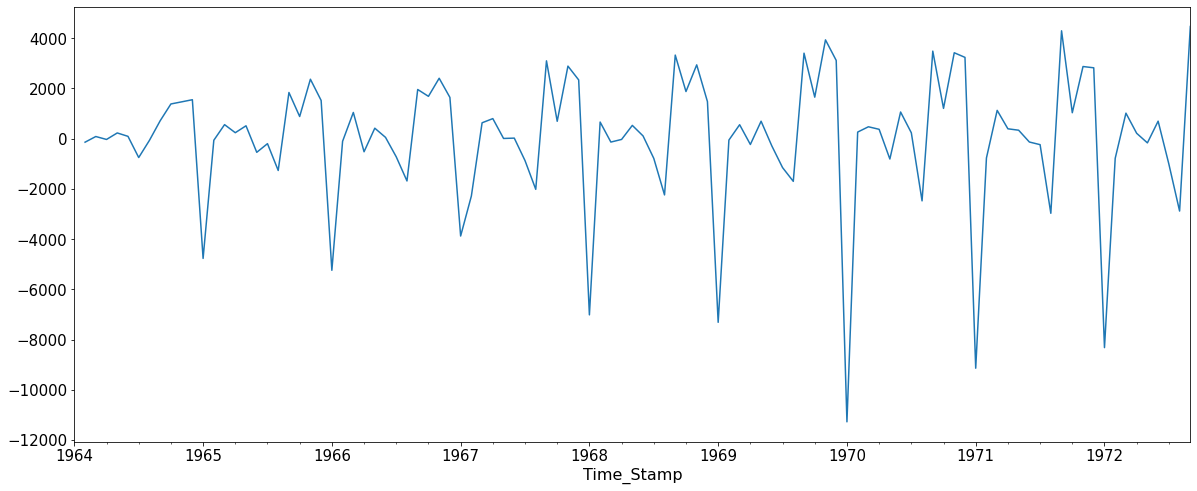

In [81]:
df['Sales First Difference'].plot(figsize=(20,8))

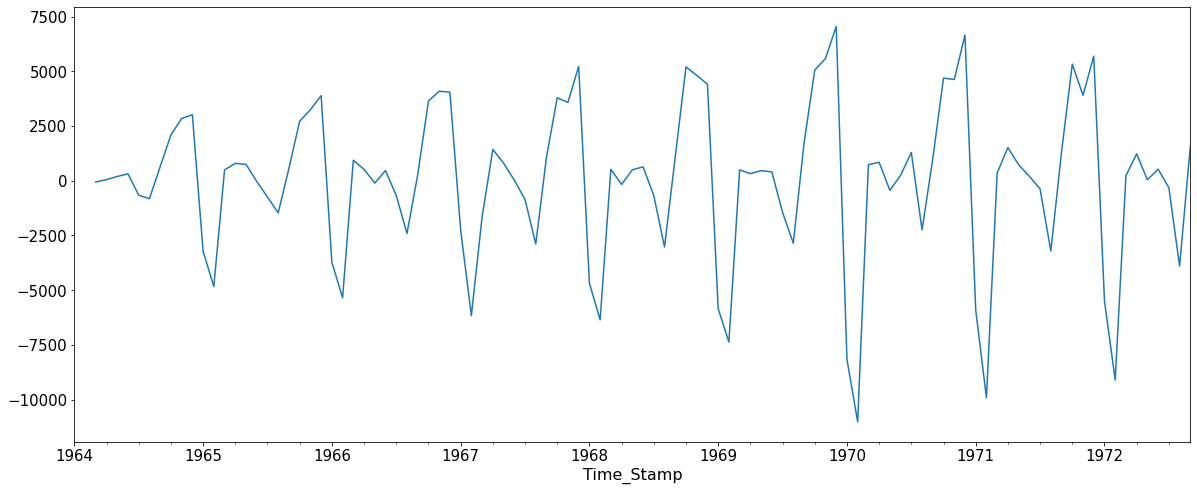

In [82]:
df['Sales second Difference'].plot(figsize=(20,8))

#### Build ARIMA model

In [92]:
import itertools

train = df[0:75]
test = df[75:105]

In [109]:
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

pdq_combination = list(itertools.product(p,d,q))
for pdq in pdq_combination:
    try:
        model = ARIMA(train['Sales'], order =pdq).fit()
        pred = model.predict(start =len(train),end =(len(df)-1))
        error = np.sqrt(mean_squared_error(test, pred))
        #order1.append(pdq)
        #rmse.append(error)
        #results = mod.fit(max_iter = 50, method = 'powell')
        #print('ARIMA{} - RMSE:{}'.format(pdq,error))
        print('ARIMA{} - AIC:{}'.format(pdq, model.aic))
        
    except:
        continue

In [108]:
p = range(0,3)
q = range(1,3)
d = range(0,3)
s = range(12,13)
# list of all parameter combos
pdq = list(itertools.product(p, d, q))

seasonal_pdq = list(itertools.product(p, d, q, s))

# SARIMA model pipeline
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            
            mod = sm.tsa.statespace.SARIMAX(train,
                                    order=param,
                                    seasonal_order=param_seasonal).fit()
        
            pred = mod.predict(start =len(train),end =(len(df)-1))
            error = np.sqrt(mean_squared_error(test, pred))
            #results = mod.fit(max_iter = 50, method = 'powell')
            
            #print('SARIMA{},{} - AIC:{}'.format(param, param_seasonal, results.aic))
            print('SARIMA{},{} - RMSE:{}'.format(param,param_seasonal,error))
           
        except:
            continue

In [95]:
model_sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 1, 1),seasonal_order=(1, 1, 1,12)).fit()
pred_sarima= model_sarima.predict(start =len(train),end =(len(df)-1))
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   75
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -500.661
Date:                            Wed, 02 Mar 2022   AIC                           1011.322
Time:                                    10:04:06   BIC                           1021.957
Sample:                                01-31-1964   HQIC                          1015.497
                                     - 03-31-1970                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1703      0.112      1.517      0.129      -0.050       0.390
ma.L1         -0.9505      0.093    -10.223      0.000      -1.133      -0.768
ar.S.L12      -0.5987      0.729     -0.822      0.411      -2.027       0.829
ma.S.L12       0.4939      0.750      0.659      0.510      -0.975       1.963
sigma2       5.37e+05   8.94e+04      6.007      0.000    3.62e+05    7.12e+05
===================================================================================
Ljung-Box (Q):                       51.77   Jarque-Bera (JB):                 6.19
Prob(Q):                              0.10   Prob(JB):                         0.05
Heteroskedasticity (H):               2.69   Skew:                             0.05
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

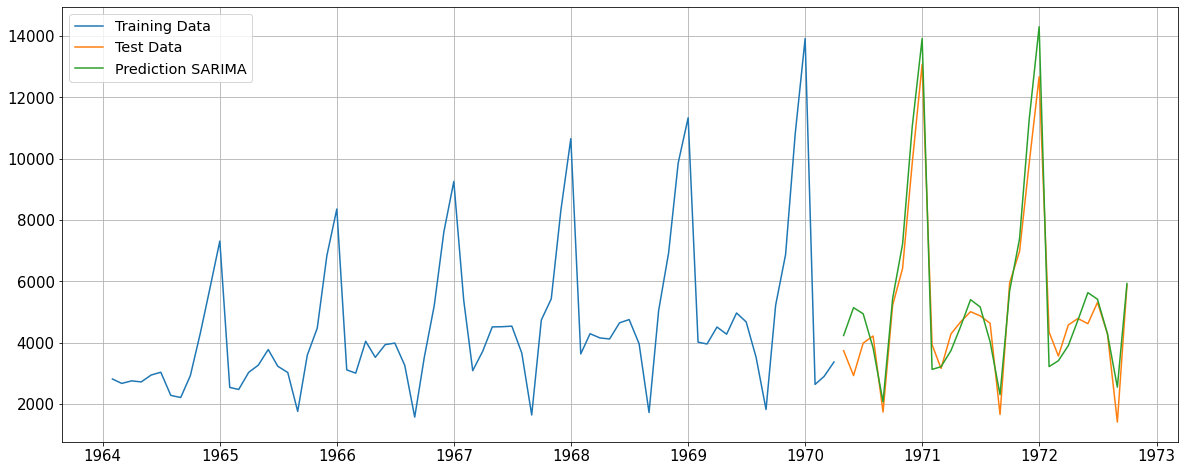

In [96]:
plt.plot(train['Sales'],label='Training Data')
plt.plot(test['Sales'],label='Test Data')
plt.plot(pred_sarima,label= 'Prediction SARIMA')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.figsize'] = 20, 8
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()

In [97]:
def rmse(t, y):
    return np.sqrt(np.mean((t-y)**2))

In [98]:
print('RMSE :', rmse(test['Sales'],pred_sarima))

RMSE : 818.7893625459797


#### Predict Future Data(3-years)

In [99]:
from pandas.tseries.offsets import DateOffset
future_dates =[df.index[-1]+DateOffset(months= x)for x in range(0,37)]

future_dataset_df =pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [100]:
future_dataset_df.head()

,Sales,Sales First Difference,Sales second Difference,Sales_log
1972-10-30,NaN,NaN,NaN,NaN
1972-11-30,NaN,NaN,NaN,NaN
1972-12-30,NaN,NaN,NaN,NaN
1973-01-30,NaN,NaN,NaN,NaN
1973-02-28,NaN,NaN,NaN,NaN


In [101]:
future_df = pd.concat([df,future_dataset_df])

In [102]:
future_df.index.name ='Time Stamp'
future_df.tail()

,Sales,Sales First Difference,Sales second Difference,Sales_log
Time Stamp,,,,
1975-05-30,NaN,NaN,NaN,NaN
1975-06-30,NaN,NaN,NaN,NaN
1975-07-30,NaN,NaN,NaN,NaN
1975-08-30,NaN,NaN,NaN,NaN
1975-09-30,NaN,NaN,NaN,NaN


In [105]:
start_date =len(train)

end_date = len(future_df)
prediction_new = model_sarima.predict(start = start_date,end = end_date)


In [106]:
prediction_new

1970-04-30    4233.169813
1970-05-31    5140.759245
1970-06-30    4942.455521
1970-07-31    3829.453999
1970-08-31    2070.931957
                 ...     
1975-06-30    6132.716662
1975-07-31    5005.092190
1975-08-31    3269.692652
1975-09-30    6652.512667
1975-10-31    8377.250502
Freq: M, Length: 67, dtype: float64

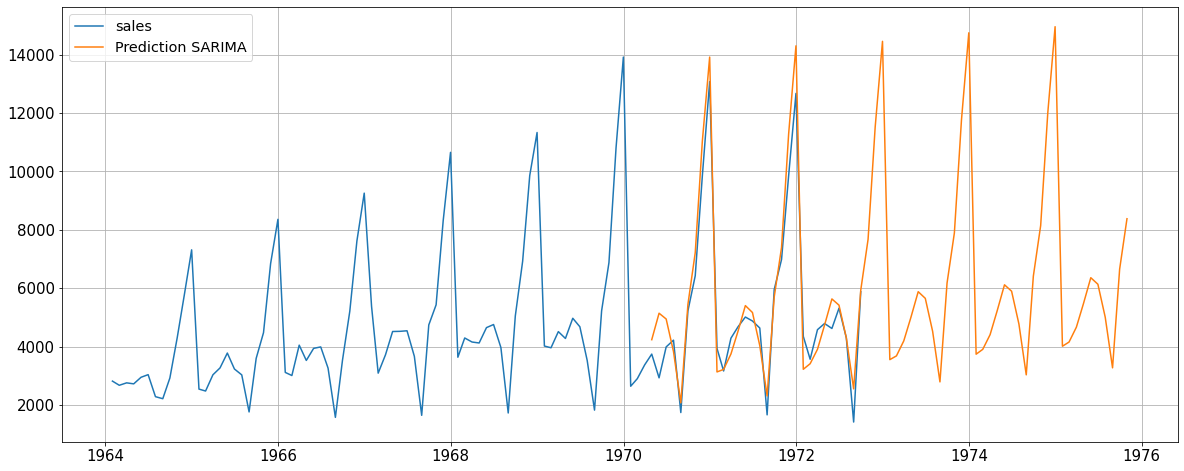

In [107]:
plt.plot(df['Sales'],label='sales')
#plt.plot(test['Sales'],label='Test Data')
plt.plot(prediction_new,label= 'Prediction SARIMA')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.figsize'] = 20, 8
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()